In [31]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pickle
from keras.preprocessing.image import ImageDataGenerator

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

Loading data set

In [33]:
train_df = pd.read_csv('../data/external/sign_mnist_train.csv')
test_df = pd.read_csv('../data/external/sign_mnist_test.csv')

In [34]:
#labels
y= test_df['label']

In [35]:
#printing initial rows
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [36]:
y_train = train_df['label']
y_test = test_df['label']

del train_df['label']
del test_df['label']

In [10]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
# y_train = label_binarizer.fit_transform(y_train)
# y_test = label_binarizer.fit_transform(y_test)

In [11]:
x_train = train_df.values
x_test = test_df.values

In [12]:
# Normalize the data
x_train = x_train / 255
x_test = x_test / 255

In [13]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

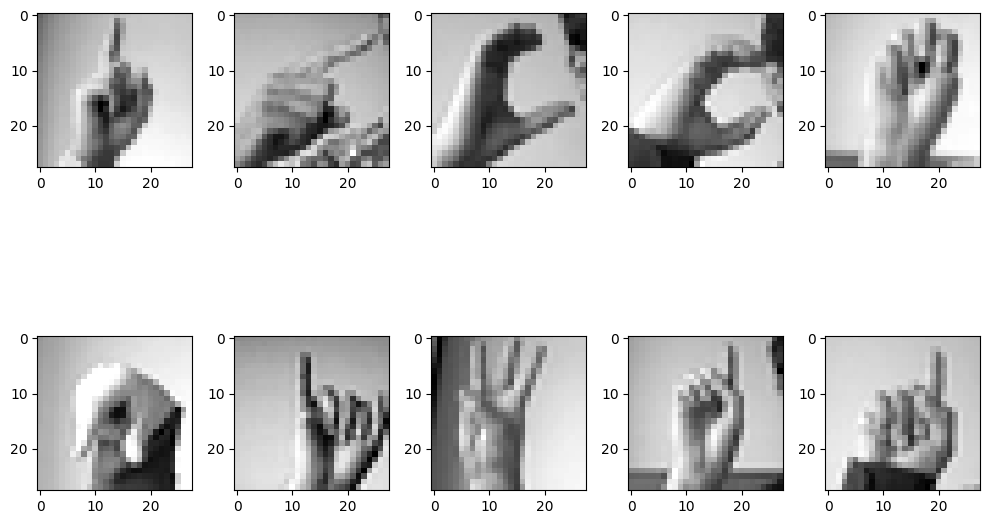

In [16]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()   

In [19]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [22]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [23]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 50)       2

In [24]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction])


Epoch 1/20
215/215 [==============================] - 40s 181ms/step - loss: 1.1033 - accuracy: 0.6547 - val_loss: 4.7306 - val_accuracy: 0.0733 - lr: 0.0010
Epoch 2/20
215/215 [==============================] - 41s 190ms/step - loss: 0.2303 - accuracy: 0.9237 - val_loss: 2.4337 - val_accuracy: 0.3415 - lr: 0.0010
Epoch 3/20
215/215 [==============================] - 37s 171ms/step - loss: 0.1085 - accuracy: 0.9647 - val_loss: 0.0541 - val_accuracy: 0.9893 - lr: 0.0010
Epoch 4/20
215/215 [==============================] - 37s 172ms/step - loss: 0.0677 - accuracy: 0.9784 - val_loss: 0.0243 - val_accuracy: 0.9971 - lr: 0.0010
Epoch 5/20
215/215 [==============================] - 37s 171ms/step - loss: 0.0474 - accuracy: 0.9856 - val_loss: 0.1309 - val_accuracy: 0.9579 - lr: 0.0010
Epoch 6/20
215/215 [==============================] - ETA: 0s - loss: 0.0376 - accuracy: 0.9881
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
215/215 [=============================

In [25]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

225/225 [==============================] - 2s 9ms/step - loss: 9.1119e-04 - accuracy: 1.0000
Accuracy of the model is -  100.0 %


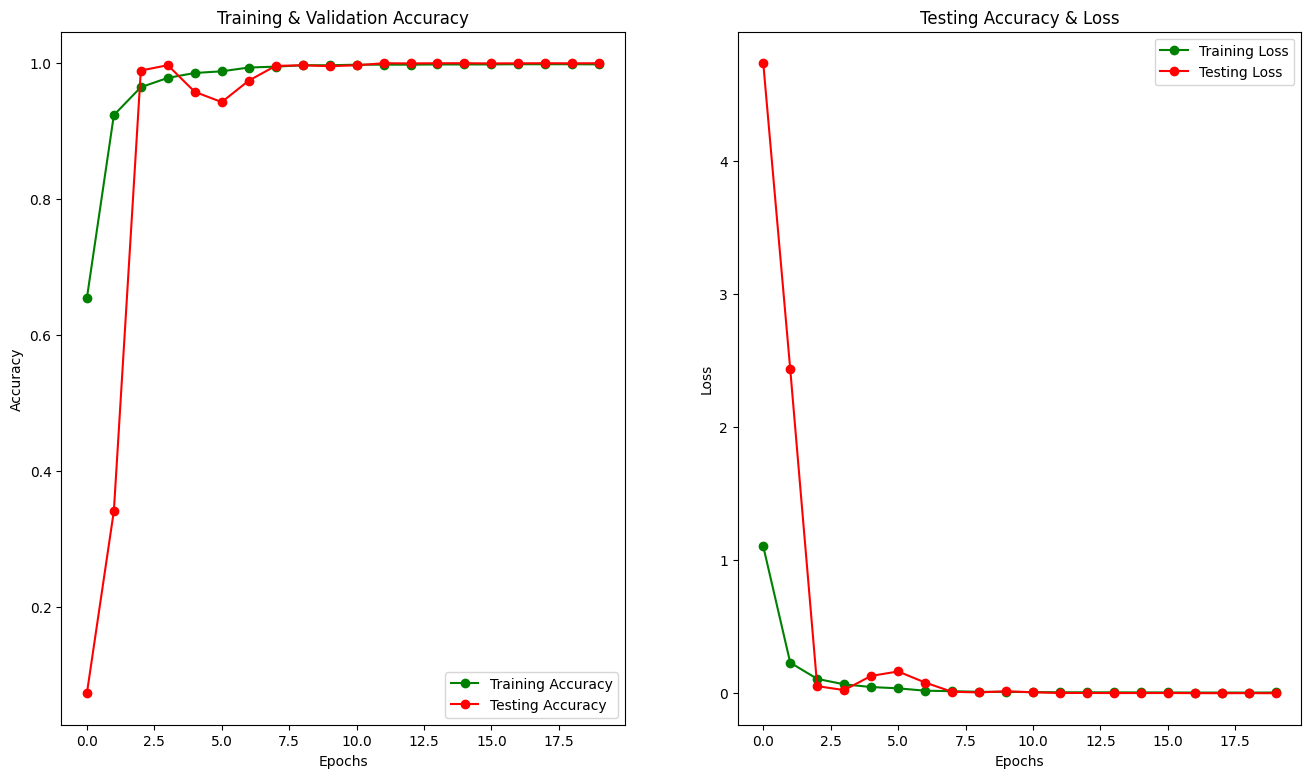

In [26]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [29]:
predictions = model.predict(x_test)
# for i in range(len(predictions)):
#     if(predictions[i] >= 9):
#         predictions[i] += 1
predictions[:5]  

225/225 [==============================] - 2s 9ms/step


array([[1.14329043e-12, 5.28825638e-12, 1.69656789e-09, 1.20829735e-12,
        3.53718086e-08, 3.90002306e-08, 9.99822438e-01, 1.69039966e-04,
        1.86036238e-11, 6.23634120e-13, 2.11233613e-12, 6.60513484e-12,
        1.29523944e-11, 1.40743888e-08, 5.21549115e-09, 1.78792572e-08,
        4.81512020e-13, 1.11668813e-10, 8.37830976e-06, 1.70549881e-14,
        2.46060984e-12, 2.82304968e-13, 6.37227728e-08, 6.52272195e-11],
       [3.75407749e-09, 6.28017602e-08, 1.30687702e-12, 1.07402712e-10,
        9.16904816e-11, 9.99644995e-01, 8.15730381e-17, 4.56347189e-18,
        2.80203909e-04, 6.29639949e-13, 4.05449003e-13, 5.74816412e-14,
        2.30245966e-12, 2.88379216e-12, 1.95510763e-13, 9.62863958e-18,
        1.95077511e-17, 9.28643230e-13, 4.90667749e-11, 5.77020152e-17,
        9.24719394e-13, 7.43050841e-05, 8.83814252e-15, 3.80603439e-07],
       [1.11169633e-17, 1.17917854e-14, 3.85614768e-18, 1.13152474e-10,
        3.09960259e-17, 2.10379670e-15, 7.32377773e-16, 2.5553

In [30]:
classes = ["Class " + str(i) for i in range(25) if i != 9]
print(classification_report(y, predictions, target_names = classes))

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets